### 동적페이지의 페이지 이동
네이버 뉴스 데이터 수집에서는 여러 페이지에서 데이터를 수집하기 위해 URL 요청값을 사용했습니다. 하지만 네이버 지도와 같은 동적페이지에서는 URL이 변하지 않기 때문에 요청값 규칙을 이용할 수 없습니다.
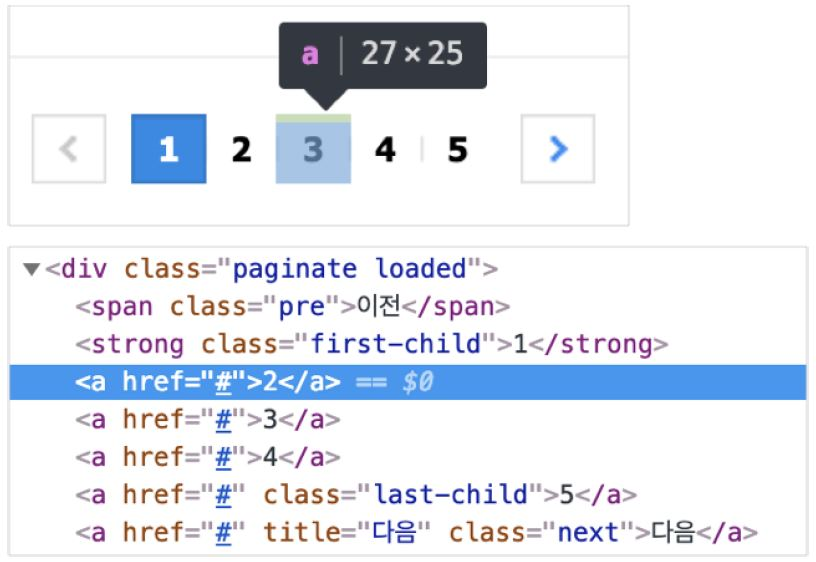
- 페이지를 넘겨가며 연속적으로(2, 3, 4, 5, ...) 클릭해주려면 페이지 버튼의 룰을 찾아야하는데 페이지 버튼의 코드는 a 와 strong이 섞여 있기 때문에 쉽게 룰을 찾을 수 없습니다.
- div.paginate > * 선택자로 데이터를 검색하면 페이지바(페이지 버튼을 포함하고 있는 부분)의 모든 버튼이 선택되는 것을 알 수 있습니다.
- find_elements_by_css_selector() 함수를 사용하면 모든 버튼을 리스트 형태로 저장할 수 있습니다.

### Ex1. 네이버지도에서 '서울대입구역 맛집'으로 검색해서 가게 이름과 장소, 전화번호 수집하기
**★최신 네이버지도는 오류가 나서 구버젼으로 코드 작성**

#### 페이지 바꿔가며 데이터 수집하기

In [1]:
from selenium import webdriver
import time

keyword = input('검색어는?: ')

driver = webdriver.Chrome('C:\\Users\\User\\Desktop/chromedriver')

driver.get('https://v4.map.naver.com/')

xbutton = driver.find_element_by_css_selector('.popup_content button.btn_close')
xbutton.click()

search = driver.find_element_by_css_selector('input#search-input')
search.send_keys(keyword)

btn = driver.find_element_by_css_selector('button.spm')
btn.click()

# 오류가 나는 이유 1 - 시간지연이 필요한 경우
time.sleep(1)

for n in range(1,5): # n은 현재 페이지를 의미
    print('현재 페이지는', n)
    
    stores = driver.find_elements_by_css_selector('div.lsnx')
    
    for s in stores:
        name = s.find_element_by_css_selector('dt > a').text
        
        # 오류가 나는 이유 2 - 전화번호나 주소가 없는 경우
        try:
            address = s.find_element_by_css_selector('dd.addr').text
        except:
            address = '주소 없음'
        try:
            tel = s.find_element_by_css_selector('dd.tel').text
        except:
            tel = '전화번호 없음'
            
        print(name, address, tel)
        
    # 다음 페이지로 이동
    page_bar = driver.find_elements_by_css_selector('div.paginate > *') # *은 모든 태그를 선택해 달라는 의미
    page_bar[n+1].click() # page_bar의 인덱싱 부분을 다음페이지(n+1)로 바꾸기
    
    time.sleep(1)
    
driver.close()

검색어는?: 서울대입구역 맛집
현재 페이지는 1
안녕부산 서울특별시 관악구 관악로14길 45 1층 지번 02-6407-0718
킷사서울 서울특별시 관악구 남부순환로226길 31 2층 킷사서울 지번 02-878-7444
동경산책 서울특별시 관악구 관악로14길 30 지번 02-875-0666
안녕베트남 서울특별시 관악구 관악로14길 70 효림빌딩 지하1층 안녕베트남 지번 02-877-3875
잔잔 샤로수길점 서울특별시 관악구 남부순환로230길 22 1층 지번 02-877-0876
고메츠 서울특별시 관악구 관악로16길 36 3층 지번 010-6326-3955
이진칸 서울특별시 관악구 남부순환로226길 9 3층 지번 02-875-1867
모힝 낙성대점 서울특별시 관악구 봉천로62길 7 지번 02-878-3233
십원집 서울특별시 관악구 봉천로 521 지번 02-873-0057
옐로우버터드림 서울특별시 관악구 관악로14나길 10 2층 지번 02-876-5533
현재 페이지는 2
마이무 서울특별시 관악구 낙성대로 22-10 1층 지번 02-882-8933
이가 서울특별시 관악구 봉천로 485-1 1층 지번 010-3330-1084
텐동요츠야 서울특별시 관악구 관악로14길 35 1층 지번 02-883-7974
에그썸 서울특별시 관악구 관악로14길 98 지번 02-6082-2442
용마커피 서울특별시 관악구 관악로14길 45 지번 070-7500-7974
박명주브라더 서울특별시 관악구 관악로14길 89 지번 02-882-9411
안녕과자점 서울특별시 관악구 남부순환로228길 20 1층 안녕과자점 지번 02-3285-0908
황홀경 서울특별시 관악구 관악로14길 37 B1 황홀경 지번 02-6449-7362
피자네버슬립스 서울특별시 관악구 봉천로 534 2층 지번 070-4115-0805
온돌 서울대입구점 서울특별시 관악구 봉천로 534 지번 02-873-8712
현재 페이지는 3
낀알로이알로이 서울특별시 관악구 청룡2길 29 지번 02-6403-4879
샤이케멘 서울특별시 

#### 더 많은 페이지의 데이터 수집하기

뒷 페이지의 데이터를 계속해서 수집하려면 5의 배수 페이지를 수집한 이후에는 > 모양의 다음 페이지 버튼을 클릭해줘야합니다.

In [2]:
from selenium import webdriver
import time

keyword = input('검색어는?: ')

driver = webdriver.Chrome('C:\\Users\\User\\Desktop/chromedriver')

driver.get('https://v4.map.naver.com/')

xbutton = driver.find_element_by_css_selector('.popup_content button.btn_close')
xbutton.click()

search = driver.find_element_by_css_selector('input#search-input')
search.send_keys(keyword)

btn = driver.find_element_by_css_selector('button.spm')
btn.click()

time.sleep(1)

# 범위를 크게 증가시키기
for n in range(1,20):
    print('현재 페이지는', n)
    stores = driver.find_elements_by_css_selector('div.lsnx')
    
    for s in stores:
        
        name = s.find_element_by_css_selector('dt > a').text
        
        try:
            address = s.find_element_by_css_selector('dd.addr').text
        except:
            address = '주소 없음'
        try:
            tel = s.find_element_by_css_selector('dd.tel').text
        except:
            tel = '전화번호 없음'
        
        print(name, address, tel)
    
    page_bar = driver.find_elements_by_css_selector('div.paginate > *')
    
    # 1. 계속해서 페이지 넘기기(6페이지 이후)
    try:
        # n이 5의 배수인 경우 > 버튼 클릭
        if n % 5 == 0: 
            page_bar[6].click()
        # n이 5의 배수 아닌 경우 다음 페이지 버튼 클릭
        else: 
            page_bar[n % 5 + 1].click()
            
    # 2. 다음 페이지가 없는 경우 에러처리
    except:
        print('수집이 끝났습니다.')
        break # 현재 반복중인 for문이 종료됨
        
    time.sleep(1)
    
driver.close()

검색어는?: 서울대입구역 맛집
현재 페이지는 1
안녕부산 서울특별시 관악구 관악로14길 45 1층 지번 02-6407-0718
킷사서울 서울특별시 관악구 남부순환로226길 31 2층 킷사서울 지번 02-878-7444
동경산책 서울특별시 관악구 관악로14길 30 지번 02-875-0666
안녕베트남 서울특별시 관악구 관악로14길 70 효림빌딩 지하1층 안녕베트남 지번 02-877-3875
잔잔 샤로수길점 서울특별시 관악구 남부순환로230길 22 1층 지번 02-877-0876
고메츠 서울특별시 관악구 관악로16길 36 3층 지번 010-6326-3955
이진칸 서울특별시 관악구 남부순환로226길 9 3층 지번 02-875-1867
모힝 낙성대점 서울특별시 관악구 봉천로62길 7 지번 02-878-3233
십원집 서울특별시 관악구 봉천로 521 지번 02-873-0057
옐로우버터드림 서울특별시 관악구 관악로14나길 10 2층 지번 02-876-5533
현재 페이지는 2
마이무 서울특별시 관악구 낙성대로 22-10 1층 지번 02-882-8933
이가 서울특별시 관악구 봉천로 485-1 1층 지번 010-3330-1084
텐동요츠야 서울특별시 관악구 관악로14길 35 1층 지번 02-883-7974
에그썸 서울특별시 관악구 관악로14길 98 지번 02-6082-2442
용마커피 서울특별시 관악구 관악로14길 45 지번 070-7500-7974
박명주브라더 서울특별시 관악구 관악로14길 89 지번 02-882-9411
안녕과자점 서울특별시 관악구 남부순환로228길 20 1층 안녕과자점 지번 02-3285-0908
황홀경 서울특별시 관악구 관악로14길 37 B1 황홀경 지번 02-6449-7362
피자네버슬립스 서울특별시 관악구 봉천로 534 2층 지번 070-4115-0805
온돌 서울대입구점 서울특별시 관악구 봉천로 534 지번 02-873-8712
현재 페이지는 3
낀알로이알로이 서울특별시 관악구 청룡2길 29 지번 02-6403-4879
샤이케멘 서울특별시 

완산정 서울특별시 관악구 봉천로 484 지번 02-878-3400
연탄부락 낙성대점 서울특별시 관악구 남부순환로 1891 지번 070-7519-3600
진우리참치 본관 서울특별시 관악구 봉천로 473 지번 02-871-8400
백채김치찌개 봉천 본점 서울특별시 관악구 청룡1길 25 지번 070-8292-2182
임성용의부추곱창 서울특별시 관악구 청룡3길 13-6 지번 02-871-6281
현재 페이지는 19
운현나라 서울특별시 관악구 관악로14길 11 지번 전화번호 없음
봉천동그집돼지 서울특별시 관악구 봉천로 467 1층 그집돼지 지번 02-877-9592
오른손푸드카페 서울특별시 관악구 관악로14길 111 1층 지번 02-803-6223
라티놀 서울특별시 관악구 관악로 154-5 지번 02-875-8285
서울대입구역 룸술집 토모 이자카야 서울특별시 관악구 관악로15길 24 지번 02-877-3410
안녕 와인 서울특별시 관악구 남부순환로234길 31 B1 안녕 와인 지번 010-7340-1640
막걸리카페잡 서울특별시 관악구 관악로14길 31 지번 02-6403-4424
독도쭈꾸미 서울특별시 관악구 남부순환로226길 19 지번 02-875-7751
도쿄빙수 샤로수길점 서울특별시 관악구 관악로14길 94 1층 지번 02-883-0578
다르빛두번째이야기 서울특별시 관악구 남부순환로234길 34 2층 지번 02-882-1002


### Ex2. 구글지도 데이터 수집하기
1. 구글지도 페이지 접속
2. 검색어 입력하고 돋보기 버튼 누르기
3. 검색결과 수집 (이름, 주소, 평점)
4. 페이지 넘기며 수집

**구글의 경우 지연시간을 길게 주셔야 합니다. (평균 5 ~ 10초)**

In [3]:
from selenium import webdriver
import time

keyword = input('검색어는?: ')

driver = webdriver.Chrome('C:\\Users\\User\\Desktop/chromedriver')

driver.get('https://www.google.com/maps')

time.sleep(10)

search = driver.find_element_by_css_selector('input#searchboxinput')
search.send_keys(keyword)

btn = driver.find_element_by_css_selector('div.searchbox-searchbutton-container')
btn.click()

for n in range(1,5):
    
    time.sleep(10)
    print('현재 페이지는', n)
    stores = driver.find_elements_by_css_selector('div.section-result-text-content')
    
    for s in stores:
        
        name = s.find_element_by_css_selector('h3 span').text
        
        try:
            address = s.find_element_by_css_selector('span.section-result-location').text
        except:
            address = '주소 없음'
            
        try:
            score = s.find_element_by_css_selector('span.cards-rating-score').text
        except:
            score = '평점 없음'
        
        print(name, '/', address, '/', score)
    
    # 1. 계속해서 페이지 넘기기
    try:
        page = driver.find_element_by_css_selector('button#n7lv7yjyC35__section-pagination-button-next') #elements라고 잘못 적었더니 페이지 안넘어갔음
        page.click()
    # 2. 다음 페이지가 없는 경우 에러처리
    except:
        print('수집이 끝났습니다.')
        break 
        
driver.close()

검색어는?: 서울대입구역 맛집
현재 페이지는 1
모힝 서울대입구점 Ristorante italiano / 봉천동 남부순환로226길 36 2층 / 4.2
서울대입구역 / 봉천동 / 4.0
지구당 / 봉천동 1598-23 / 4.1
외래향 中餐厅 / 중앙동 남부순환로 1801 벽송빌딩 2층 / 4.0
삼미옥 / 봉천동 남부순환로 1829-6 / 3.9
텐동 요츠야 / 봉천동 관악로14길 35 / 4.3
자연별곡 서울대입구점 / 중앙동 관악로 195 / 3.7
풍년옥 / 청룡동 863-11 / 3.6
지중해 / 봉천동 861-11 / 4.2
도리도리하찌 / 봉천동 관악로14길 77 / 3.6
가장맛있는족발 서울대입구역점 / 봉천동 봉천로 482 / 3.6
봉추찜닭 서울대입구역점 / 낙성대동 1601-3 / 3.7
에그썸 / 낙성대동 관악로14길 98 / 3.9
완산정 / 행운동 858-2 / 3.9
모다 모다 / 낙성대동 1604-20 / 4.1
돈뼈락 연탄갈비 / 봉천동 1666-26 / 3.7
더 멜팅팟 / 봉천동 1613-4 / 4.2
낙성곱창 본점 / 행운동 봉천로 495-3 / 4.3
고명집 / 봉천동 858-1 / 4.3
채선당 서울대입구역점 / 봉천동 남부순환로 1838 / 3.8
현재 페이지는 2
유락 / 청룡동 1693-12 2층 / 4.2
옷살 / 봉천동 관악로 164 / 4.4
카모메서울대입구점 / 봉천동 / 4.2
대호아구집 / 행운동 858-4 / 4.1
봉천곱창 / 봉천동 / 3.6
황토방 / 봉천동 관악로12길 6 2층 / 4.4
안녕베트남 Nhà hàng Việt Nam / 봉천동 관악로14길 70 / 4.1
우리가참순대 / 낙성대동 1598-20 B1 / 4.4
안집 / 봉천동 1596-1 / 3.8
가마솥 / 봉천동 895-19 / 4.0
갈매기조나단 / 봉천동 1569-3 / 3.9
마이무 MY MOO / 봉천동 낙성대로 22-10 1층 / 4.1
감나무집 / 봉천동 1571-12 / 4.1
남고집 / 856-5 대우디오슈페리움1차